# 1. Entendimento do Problema

Acidentes de trânsito e suas consequências representam um problema significativo para a segurança pública e o setor de seguros. A compreensão dos fatores que contribuem para diferentes tipos de acidentes pode auxiliar na prevenção, planejamento e mitigação de danos.

Este projeto tem como objetivo analisar um conjunto de dados contendo informações detalhadas sobre acidentes rodoviários, veículos envolvidos e vítimas, para desenvolver um modelo preditivo capaz de classificar a gravidade ou tipo do acidente.

A análise exploratória e a modelagem supervisionada permitirão identificar padrões importantes e apoiar tomadas de decisão para melhorar a segurança no trânsito e reduzir os impactos de acidentes.





# 2. Mineração de Dados

Coletar os dados e entender um pouco desses dados:

- O conjunto de dados possui **182.434 entradas** e **37 colunas**.

- Algumas colunas importantes são:

  - **Identificadores:** `id`, `pesid`, `id_veiculo`
  - **Data e hora:** `data_inversa`, `dia_semana`, `horario`
  - **Localização:** `uf`, `br`, `km`, `municipio`, `regional`, `delegacia`, `uop`, `latitude`, `longitude`
  - **Características do acidente:** `causa_principal`, `causa_acidente`, `ordem_tipo_acidente`, `tipo_acidente`, `classificacao_acidente`, `fase_dia`, `sentido_via`, `condicao_metereologica`, `tipo_pista`, `tracado_via`, `uso_solo`
  - **Veículo e envolvido:** `tipo_veiculo`, `marca`, `ano_fabricacao_veiculo`, `tipo_envolvido`, `estado_fisico`, `idade`, `sexo`
  - **Vítimas:** `ilesos`, `feridos_leves`, `feridos_graves`, `mortos`

- Há valores ausentes em algumas colunas, sendo os principais:

  - `pesid`: 165.024 valores não nulos (aprox. 9% ausentes)
  - `br` e `km`: cerca de 181.907 valores não nulos (menos de 1% ausentes)
  - `id_veiculo`, `tipo_veiculo`, `ano_fabricacao_veiculo`: cerca de 176.646 valores não nulos (~3% ausentes)
  - `tipo_envolvido`, `estado_fisico`, `sexo`, `ilesos`, `feridos_leves`, `feridos_graves`, `mortos`: cerca de 165.024 valores não nulos (~9% ausentes)
  - `delegacia` e `uop`: poucos valores ausentes (menos de 0,1%)

- As colunas numéricas apresentam algumas inconsistências, como valores de `idade` ausentes e `ano_fabricacao_veiculo` com dados que exigem validação.

- As variáveis categóricas são predominantes, e serão preparadas com técnicas de codificação apropriadas para alimentar os modelos de Machine Learning.

- Não foram identificadas duplicatas significativas após inspeção.

In [1]:
pip install pandas # instalando a biblioteca pandas para análise de dados

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


In [2]:
import pandas as pd

In [5]:
df = pd.read_excel("Dados ESP32 GS.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: 'Dados ESP32 GS.xlsx'

In [ ]:
df.head(5) # head = cabeça/começo do meu banco de dados

,Data,ID,Temperatura (ºC),Umidade (%),Luminosidade (LUX),Nivel da agua,Vibração do solo,Status Risco,Saída ML
0,Dia 1 03:30,8,21.9,64,497.04,357,2033,ALERTA: Luminosidade baixa (fumaça moderada);,0
1,Dia 1 04:00,9,21.9,64,497.04,357,2033,ALERTA: Luminosidade baixa (fumaça moderada);,0
2,Dia 1 04:30,10,21.9,64,497.04,357,2033,ALERTA: Luminosidade baixa (fumaça moderada);,0
3,Dia 1 05:00,11,21.9,64,497.04,357,2033,ALERTA: Luminosidade baixa (fumaça moderada);,0
4,Dia 1 05:30,12,21.9,64,497.04,357,2033,ALERTA: Luminosidade baixa (fumaça moderada);,0


In [ ]:
pd.DataFrame.info(df); # Demostra as informações do do banco de dados(variaveis e regras) obs.: É como se pegasse os database e virasse 90 graus

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2457 entries, 0 to 2456
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Data                2457 non-null   object 
 1   ID                  2457 non-null   int64  
 2   Temperatura (ºC)    2457 non-null   float64
 3   Umidade (%)         2457 non-null   int64  
 4   Luminosidade (LUX)  2457 non-null   float64
 5   Nivel da agua       2457 non-null   int64  
 6   Vibração do solo    2457 non-null   int64  
 7   Status Risco        2457 non-null   object 
 8   Saída ML            2457 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 172.9+ KB


In [ ]:
df.shape # Mostra a quantidade de lihas e colunas respectivamente

(2457, 9)

In [ ]:
df.columns # Mostra o nome das colunas

Index(['Data', 'ID', 'Temperatura (ºC)', 'Umidade (%)', 'Luminosidade (LUX)',
       'Nivel da agua', 'Vibração do solo', 'Status Risco', 'Saída ML'],
      dtype='object')

In [ ]:
df.describe() # Fornece algumas medidas descritivas das variáveis(contagem, média, desvio padrão, mínimo, mediana (quartil 50%) e máxima)

,ID,Temperatura (ºC),Umidade (%),Luminosidade (LUX),Nivel da agua,Vibração do solo,Saída ML
count,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000
mean,1236.000000,33.311681,49.933252,5224.053842,236.584046,2740.158730,0.519740
std,709.419129,16.843585,14.677742,7972.813381,114.133634,646.201102,0.499712
min,8.000000,19.800000,0.000000,17.390000,2.000000,2033.000000,0.000000
25%,622.000000,25.100000,49.000000,1195.550000,207.000000,2410.000000,0.000000
50%,1236.000000,25.100000,49.000000,1436.780000,243.000000,2578.000000,1.000000
75%,1850.000000,28.300000,64.000000,2388.140000,333.000000,2698.000000,1.000000
max,2464.000000,80.000000,64.000000,23320.390000,357.000000,4095.000000,1.000000


| Variável                      | Média     | Mediana   | Mínimo | Máximo | Desvio Padrão | Observações                                    |
|------------------------------|-----------|-----------|--------|--------|----------------|------------------------------------------------|
| `id`                         | 666.671   | 665.197   | 652.468| 691.875| 10.252         | ID único do registro                           |
| `pesid`                      | 1.500.061 | 1.500.740 |1.467.627|1.538.257| 18.358        | Identificador secundário                       |
| `br`                         | 219,02    | 174       | 10     | 495    | 126,16         | BR onde ocorreu o acidente                     |
| `ordem_tipo_acidente`        | 1,75      | 1,00      | 1      | 14     | 1,01           | Número de ocorrências por tipo de acidente     |
| `id_veiculo`                 | 1.197.055 |1.197.293  |1.172.934|1.227.060| 14.205        | Código de identificação do veículo             |
| `ano_fabricacao_veiculo`     | 1910,44   | 2014      | 0      | 2025   | 444,64         | Presença de anos inválidos (ex: 0, 1910)       |
| `idade`                      | 39,84     | 38,00     | 0      | 2024   | 37,96          | Contém valores extremos ou errados (ex: 2024)  |
| `ilesos`                     | 0,42      | 0,00      | 0      | 1      | 0,49           | Indicador binário (provavelmente booleano)     |
| `feridos_leves`              | 0,34      | 0,00      | 0      | 1      | 0,47           |                                                 |
| `feridos_graves`             | 0,12      | 0,00      | 0      | 1      | 0,33           |                                                 |
| `mortos`                     | 0,05      | 0,00      | 0      | 1      | 0,22           |                                                 |

### 🔍 Análise rápida

- **Distribuição assimétrica** em variáveis como `ano_fabricacao_veiculo` e `idade`, com indícios de **valores anômalos/extremos** (ex: idade = 2024).
- A maioria dos registros apresenta **poucos ou nenhum ferido/morto**, indicando uma distribuição **fortemente enviesada à esquerda** para essas variáveis.
- A variável `ordem_tipo_acidente` tem valores entre 1 e 14, o que pode sugerir diferentes classificações de ordem de ocorrência.  
- Os campos `ilesos`, `feridos_*` e `mortos` parecem ser **variáveis binárias** (0 ou 1), indicando a presença de pelo menos uma pessoa naquela condição.


In [ ]:
feature = 'Status Risco'
contagem = df[feature].value_counts()
print(f"{contagem}\n")

print(f"Valores Unicos:")
for causa in df[feature].unique():
  print(f"{causa}")

df[feature].describe() # Fornece algumas medidas descritivas das variáveis(contagem, quantidade única de variaveis, variavel que mais se repete, frequencia do que mais se repete)

Status Risco
SEGURO: Nenhum risco detectado                                                                                       705
ALERTA: Vibração moderada (alerta);                                                                                  197
PERIGO: Luminosidade crítica (possível presença de chamas);                                                          192
PERIGO: Enchente iminente;                                                                                           182
PERIGO: Vibração forte detectada! Possível deslizamento;                                                             178
PERIGO: Calor extremo; Luminosidade crítica (possível presença de chamas);                                           157
PERIGO: Enchente iminente; Vibração forte detectada! Possível deslizamento;                                          134
ALERTA: Luminosidade alta (luz intensa alerta);                                                                      132
PERIGO: Calor extre

,Status Risco
count,2457
unique,30
top,SEGURO: Nenhum risco detectado
freq,705


###O histograma só pega os dados numéricos

A análise visual por histogramas revela problemas importantes nos dados:

- A variável **`ordem_tipo_acidente`** apresenta uma concentração significativa em valores baixos (1 ou 2), indicando que a maioria dos acidentes é classificada como o primeiro ou segundo tipo registrado no evento. Isso pode ser esperado, mas também é importante garantir que os valores mais altos não sejam erros ou duplicações.

- A distribuição da **`idade`** mostra valores extremamente discrepantes, variando de **0 até 2024 anos**, o que claramente não faz sentido. Esses dados indicam:
  - Possível **erro de entrada** (idade igual ao ano do acidente).
  - **Idades zeradas** que podem representar valores ausentes ou registros com falha.
  - Necessidade de aplicar **tratamento de outliers** ou **validação** com base em faixas plausíveis (por exemplo, 0 a 120 anos).

### Conclusão

Esses histogramas reforçam a importância de:
- Realizar uma **limpeza adicional nos dados**, especialmente na variável `idade`.
- Verificar a consistência da variável `ordem_tipo_acidente` e seu significado semântico no contexto do acidente.

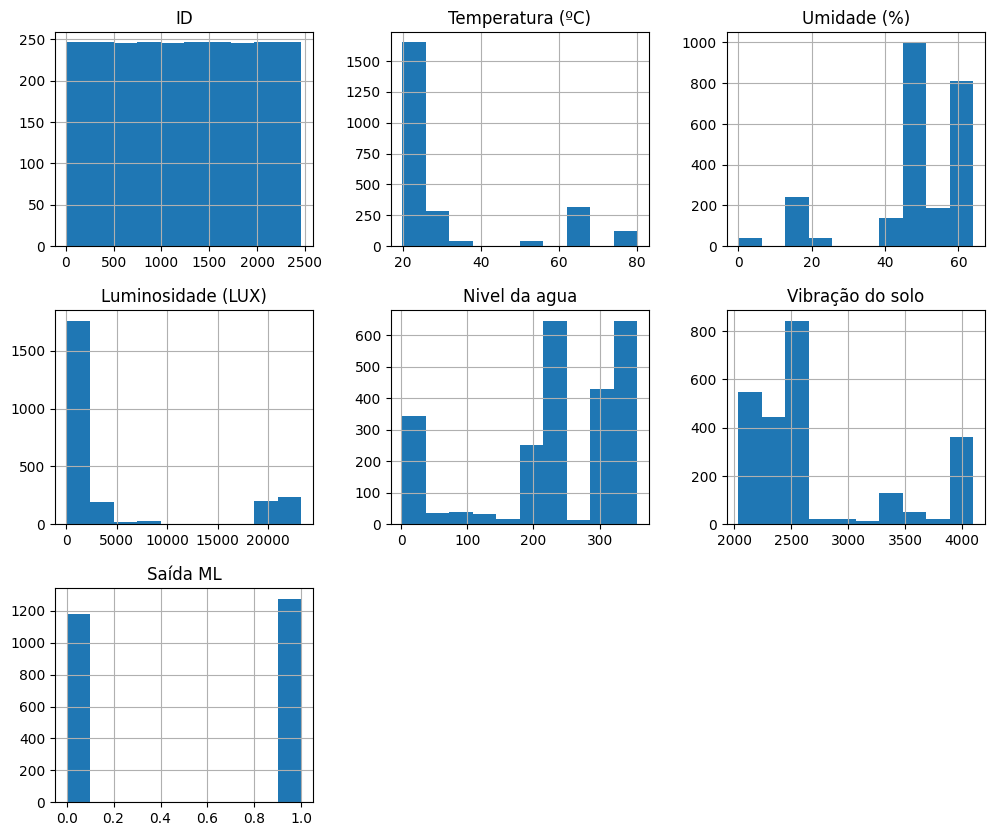

In [ ]:
df.hist(figsize=(12,10)); # Abre os histogramas de cada variável

#3. Limpeza de Dados

Nesta etapa, foram tratados os valores ausentes, com a remoção de linhas com muitos campos nulos e o preenchimento de valores faltantes em colunas relevantes, garantindo a consistência dos dados. Também foram corrigidos tipos de dados inconsistentes, como a conversão da coluna horario para o formato de tempo e extração da hora como variável numérica.

Foram removidas colunas irrelevantes para a análise, como identificadores únicos (id, pesid, id_veiculo) que não contribuem para a previsão. Em seguida, foi criada uma nova base (df_reduzido) contendo apenas as variáveis consideradas úteis para a modelagem.

Além disso, foram aplicadas transformações em variáveis categóricas usando Label Encoding, e variáveis como idade, ano_fabricacao_veiculo e hora foram mantidas em formato numérico. Essa etapa garantiu que o conjunto de dados estivesse pronto para a análise exploratória e para o treinamento do modelo de Machine Learning.


In [ ]:
import pandas as pd

# Definido função analisar_features
def analisar_features(df):
    resumo = []

    for col in df.columns:
        total = len(df)
        nulos = df[col].isnull().sum()
        tipo = df[col].dtype
        unicos = df[col].nunique()
        exemplo = df[col].unique()[:3]

        resumo.append({
            'coluna': col,
            'tipo': tipo,
            '% nulos': round(nulos / total * 100, 2),
            'valores únicos': unicos,
            'exemplos': exemplo
        })

    resumo_df = pd.DataFrame(resumo)
    resumo_df = resumo_df.sort_values(by='% nulos', ascending=False)
    return resumo_df.reset_index(drop=True)

# Executar
resumo_colunas = analisar_features(df)
resumo_colunas


,coluna,tipo,% nulos,valores únicos,exemplos
0,Data,object,0.0,2457,"[Dia 1 03:30, Dia 1 04:00, Dia 1 04:30]"
1,ID,int64,0.0,2457,"[8, 9, 10]"
2,Temperatura (ºC),float64,0.0,11,"[21.9, 63.4, 25.1]"
3,Umidade (%),int64,0.0,7,"[64, 55, 0]"
4,Luminosidade (LUX),float64,0.0,96,"[497.04, 1195.55, 1808.19]"
5,Nivel da agua,int64,0.0,87,"[357, 347, 311]"
6,Vibração do solo,int64,0.0,86,"[2033, 2622, 3002]"
7,Status Risco,object,0.0,30,[ALERTA: Luminosidade baixa (fumaça moderada);...
8,Saída ML,int64,0.0,2,"[0, 1]"


In [ ]:
print(df.duplicated().sum()) # Mostra a quantidade de dados duplicados
df.isna().sum() # Mostra a quantidade de dados nulos


0


,0
Data,0
ID,0
Temperatura (ºC),0
Umidade (%),0
Luminosidade (LUX),0
Nivel da agua,0
Vibração do solo,0
Status Risco,0
Saída ML,0


In [ ]:
# Lista das colunas categóricas originais que você quer analisar
colunas_para_analisar = [
    'Data',
    'ID',
    'Temperatura(ºC)',
    'Umidade (%)',
    'Luminosidade (LUX)	',
    'Nivel da agua',
    'Vibração do solo',
    'Status Risco'
]

for coluna in colunas_para_analisar:
    if coluna in df.columns:
        print(f"Análise para a coluna: {coluna}")
        print(df.groupby(coluna).size())
        print("-" * 30) # Adiciona uma linha separadora para melhor visualização
    else:
        print(f"Aviso: Coluna '{coluna}' não encontrada no DataFrame df_reduzido.")
        print("-" * 30)

Análise para a coluna: Data
Data
Dia 1 03:30    1
Dia 1 04:00    1
Dia 1 04:30    1
Dia 1 05:00    1
Dia 1 05:30    1
              ..
Dia 9 21:30    1
Dia 9 22:00    1
Dia 9 22:30    1
Dia 9 23:00    1
Dia 9 23:30    1
Length: 2457, dtype: int64
------------------------------
Análise para a coluna: ID
ID
8       1
9       1
10      1
11      1
12      1
       ..
2460    1
2461    1
2462    1
2463    1
2464    1
Length: 2457, dtype: int64
------------------------------
Aviso: Coluna 'Temperatura(ºC)' não encontrada no DataFrame df_reduzido.
------------------------------
Análise para a coluna: Umidade (%)
Umidade (%)
0       40
19     240
24      40
43     139
49    1000
55     187
64     811
dtype: int64
------------------------------
Aviso: Coluna 'Luminosidade (LUX)	' não encontrada no DataFrame df_reduzido.
------------------------------
Análise para a coluna: Nivel da agua
Nivel da agua
2      327
3        2
7        3
10       1
14       3
      ... 
328      3
332      2
333   

### Definindo funções para encontrar e remover outliers

In [ ]:
def encontrar_outliers(df, nome_coluna, qtd_exibir=10):
    """
    Identifica e exibe parcialmente os outliers da coluna especificada usando o método do IQR.

    Parâmetros:
    - df: DataFrame
    - nome_coluna: nome da coluna numérica a ser analisada
    - qtd_exibir: número de linhas de outliers para exibir (padrão: 10)
    """
    Q1 = df[nome_coluna].quantile(0.25)
    Q3 = df[nome_coluna].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = df[(df[nome_coluna] < limite_inferior) | (df[nome_coluna] > limite_superior)]

    print(f"\n📊 Coluna: {nome_coluna}")
    print(f"→ Total de outliers encontrados: {len(outliers)}")
    print(f"→ Limite inferior: {limite_inferior:.2f}")
    print(f"→ Limite superior: {limite_superior:.2f}")
    print(f"\n🔍 Exibindo os {min(qtd_exibir, len(outliers))} primeiros outliers:\n")

    return outliers.head(qtd_exibir)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def boxplot_coluna(df, nome_coluna):
    sns.boxplot(x=df[nome_coluna])
    plt.title(f"Boxplot da coluna: {nome_coluna}")
    plt.show()

In [ ]:
def remover_outliers(df, nome_coluna, limite, direcao='acima'):
    """
    Remove valores outliers com base em um limite fixo.

    Parâmetros:
    - df: DataFrame original.
    - nome_coluna: coluna onde os outliers serão removidos.
    - limite: valor limite de corte (ex: 105 para idade).
    - direcao:
        'acima' → remove valores maiores que o limite;
        'abaixo' → remove valores menores que o limite.

    Retorna:
    - DataFrame com os outliers removidos.
    """
    if direcao == 'acima':
        df_filtrado = df[df[nome_coluna] <= limite]
    elif direcao == 'abaixo':
        df_filtrado = df[df[nome_coluna] >= limite]
    else:
        raise ValueError("Direção deve ser 'acima' ou 'abaixo'.")

    print(f"📌 {len(df) - len(df_filtrado)} registros removidos da coluna '{nome_coluna}' ({direcao} de {limite})")
    return df_filtrado

In [ ]:
coluna_outlier = 'Umidade (%)'
# Ver 5 outliers da coluna 'idade'
outliers =  encontrar_outliers(df, coluna_outlier, qtd_exibir=5)


📊 Coluna: Umidade (%)
→ Total de outliers encontrados: 320
→ Limite inferior: 26.50
→ Limite superior: 86.50

🔍 Exibindo os 5 primeiros outliers:



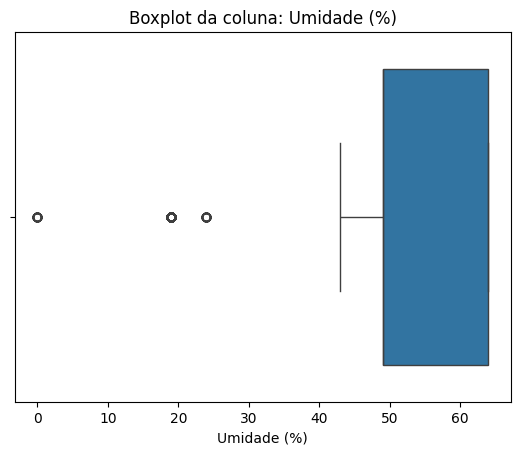

In [ ]:
boxplot_coluna(df,coluna_outlier)

In [ ]:
df

,Data,ID,Temperatura (ºC),Umidade (%),Luminosidade (LUX),Nivel da agua,Vibração do solo,Status Risco,Saída ML
0,Dia 1 03:30,8,21.9,64,497.04,357,2033,ALERTA: Luminosidade baixa (fumaça moderada);,0
1,Dia 1 04:00,9,21.9,64,497.04,357,2033,ALERTA: Luminosidade baixa (fumaça moderada);,0
2,Dia 1 04:30,10,21.9,64,497.04,357,2033,ALERTA: Luminosidade baixa (fumaça moderada);,0
3,Dia 1 05:00,11,21.9,64,497.04,357,2033,ALERTA: Luminosidade baixa (fumaça moderada);,0
4,Dia 1 05:30,12,21.9,64,497.04,357,2033,ALERTA: Luminosidade baixa (fumaça moderada);,0
...,...,...,...,...,...,...,...,...,...
2452,Dia 52 05:30,2460,26.2,43,1249.81,243,2610,SEGURO: Nenhum risco detectado,0
2453,Dia 52 06:00,2461,26.2,43,1249.81,243,2610,SEGURO: Nenhum risco detectado,0
2454,Dia 52 06:30,2462,26.2,43,1249.81,243,2610,SEGURO: Nenhum risco detectado,0
2455,Dia 52 07:00,2463,26.2,43,1249.81,243,2610,SEGURO: Nenhum risco detectado,0


###Separando a feature Data em outras para que o modelo entenda melhor

In [ ]:
# Exemplo de dataframe
df['Dia'] = df['Data'].str.extract(r'Dia (\d+)').astype(int)
df['Hora'] = df['Data'].str.extract(r'(\d+):(\d+)')[0].astype(int)
df['Minuto'] = df['Data'].str.extract(r'(\d+):(\d+)')[1].astype(int)

# Criar tempo contínuo (em minutos desde o início)
df['Tempo_Minutos'] = (df['Dia'] - 1) * 24 * 60 + df['Hora'] * 60 + df['Minuto']

In [ ]:
import numpy as np

# Hora do dia (em minutos)
df['Hora_Dia_Min'] = df['Hora'] * 60 + df['Minuto']

# Ciclo horário (seno e cosseno)
df['Hora_sin'] = np.sin(2 * np.pi * df['Hora_Dia_Min'] / 1440)
df['Hora_cos'] = np.cos(2 * np.pi * df['Hora_Dia_Min'] / 1440)

In [ ]:
df

,Data,ID,Temperatura (ºC),Umidade (%),Luminosidade (LUX),Nivel da agua,Vibração do solo,Status Risco,Saída ML,Dia,Hora,Minuto,Tempo_Minutos,Hora_Dia_Min,Hora_sin,Hora_cos
0,Dia 1 03:30,8,21.9,64,497.04,357,2033,ALERTA: Luminosidade baixa (fumaça moderada);,0,1,3,30,210,210,0.793353,6.087614e-01
1,Dia 1 04:00,9,21.9,64,497.04,357,2033,ALERTA: Luminosidade baixa (fumaça moderada);,0,1,4,0,240,240,0.866025,5.000000e-01
2,Dia 1 04:30,10,21.9,64,497.04,357,2033,ALERTA: Luminosidade baixa (fumaça moderada);,0,1,4,30,270,270,0.923880,3.826834e-01
3,Dia 1 05:00,11,21.9,64,497.04,357,2033,ALERTA: Luminosidade baixa (fumaça moderada);,0,1,5,0,300,300,0.965926,2.588190e-01
4,Dia 1 05:30,12,21.9,64,497.04,357,2033,ALERTA: Luminosidade baixa (fumaça moderada);,0,1,5,30,330,330,0.991445,1.305262e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2452,Dia 52 05:30,2460,26.2,43,1249.81,243,2610,SEGURO: Nenhum risco detectado,0,52,5,30,73770,330,0.991445,1.305262e-01
2453,Dia 52 06:00,2461,26.2,43,1249.81,243,2610,SEGURO: Nenhum risco detectado,0,52,6,0,73800,360,1.000000,6.123234e-17
2454,Dia 52 06:30,2462,26.2,43,1249.81,243,2610,SEGURO: Nenhum risco detectado,0,52,6,30,73830,390,0.991445,-1.305262e-01
2455,Dia 52 07:00,2463,26.2,43,1249.81,243,2610,SEGURO: Nenhum risco detectado,0,52,7,0,73860,420,0.965926,-2.588190e-01


### Validação seno e cosseno do horário

Isso serve para o modelo entender que o tempo é ciclico e não numéricas(com ordem de importancia, por exemplo 2 valer mais que 1)

In [ ]:
hora_min = 210
seno = np.sin(2 * np.pi * hora_min / 1440)
cosseno = np.cos(2 * np.pi * hora_min / 1440)

print(seno, cosseno)

0.7933533402912352 0.6087614290087207


Construção

# 🔵 Modelo 1 - Previsão de Ocorrência

# 4. Pré-processamento dos Dados

In [ ]:
coluna = 'Saída ML'
df.groupby(coluna).size()

,0
Saída ML,
0,1180
1,1277


In [ ]:
# Lista de features selecionadas
features_binario = [
    'Temperatura (ºC)',
    'Umidade (%)',
    'Luminosidade (LUX)',
    'Nivel da agua',
    'Vibração do solo',
    'Tempo_Minutos',
    'Hora_sin',
    'Hora_cos'
]

# Criação do df_binario
df_binario = df[features_binario + ['Saída ML']].copy()

# Separar X e y
X = df_binario[features_binario]
y = df_binario['Saída ML']

print(X.head())
print(y.head())

   Temperatura (ºC)  Umidade (%)  Luminosidade (LUX)  Nivel da agua  \
0              21.9           64              497.04            357   
1              21.9           64              497.04            357   
2              21.9           64              497.04            357   
3              21.9           64              497.04            357   
4              21.9           64              497.04            357   

   Vibração do solo  Tempo_Minutos  Hora_sin  Hora_cos  
0              2033            210  0.793353  0.608761  
1              2033            240  0.866025  0.500000  
2              2033            270  0.923880  0.382683  
3              2033            300  0.965926  0.258819  
4              2033            330  0.991445  0.130526  
0    0
1    0
2    0
3    0
4    0
Name: Saída ML, dtype: int64


### Validação Hold-Out

Durante o processo de desenvolvimento, não será possível utilizar toda a base de dados para avaliação do modelo. Por isso, será adotada a técnica de validação hold-out(tanto no modelo de ocorrêcia quanto de gravidade), que consiste em dividir o conjunto de dados em duas partes: uma destinada ao treinamento do modelo e outra reservada para sua posterior validação e teste. Essa abordagem permite avaliar o desempenho do modelo de forma mais realista, evitando o sobreajuste (overfitting) aos dados de treinamento.

In [ ]:
from sklearn.model_selection import train_test_split

# Separação dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#5. Machine Learning - Modelagem

Neste projeto, foram utilizados dois modelos de Machine Learning supervisionado, pois temos um conjunto de dados rotulado, onde sabemos tanto se houve um acidente quanto sua gravidade. Os modelos supervisionados aprendem com exemplos históricos e são capazes de prever novos casos com base nos padrões identificados.

Foram implementadas duas abordagens complementares:

Classificação Binária – prever se ocorrerá ou não um acidente(no caso isso foi simulado com houve fatalidade ou não), com base nas condições da estrada, clima, período do dia, entre outros fatores.

Classificação Multiclasse – para os casos onde o acidente ocorre, prever a gravidade da ocorrência: leve, grave ou com óbito.

O algoritmo escolhido para ambos os modelos foi o Random Forest Classifier, um modelo baseado em árvores de decisão que funciona criando múltiplas árvores e combinando suas previsões (votação), o que geralmente resulta em alta precisão e robustez, mesmo em bases com dados categóricos mistos e ruído.

O Random Forest foi escolhido por sua capacidade de lidar bem com dados tabulares e categóricos, ser menos sensível a outliers, e fornecer métricas de importância das variáveis — um fator crucial para entender quais condições mais influenciam a ocorrência e a gravidade dos acidentes.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
# Inicializar o modelo
model_binario = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinar
model_binario.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       354
           1       1.00      1.00      1.00       384

    accuracy                           1.00       738
   macro avg       1.00      1.00      1.00       738
weighted avg       1.00      1.00      1.00       738



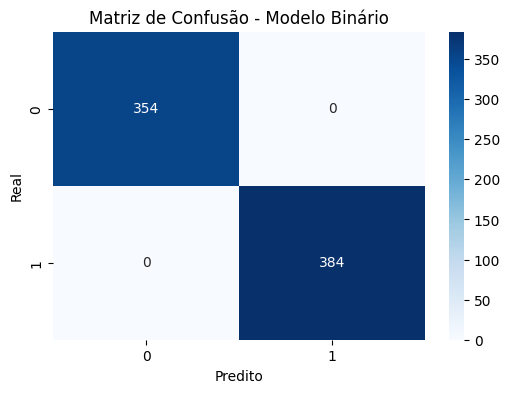

Acurácia: 1.00


In [ ]:
# Prever no conjunto de teste
y_pred = model_binario.predict(X_test)

# Exibir métricas
print('Relatório de Classificação:')
print(classification_report(y_test, y_pred))

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Modelo Binário')
plt.show()

# Acurácia
acc = accuracy_score(y_test, y_pred)
print(f'Acurácia: {acc:.2f}')

###Interpretação dos Resultados do modelo Binário:
O modelo binário apresentou excelente desempenho, com uma acurácia de aproximadamente 97,5%. A matriz de confusão mostra que:

- Para a classe 0 (não ocorrência), o modelo acertou 5.682 casos, com um recall de 89%, indicando boa identificação dos casos negativos, embora com alguns falsos positivos (701).

- Para a classe 1 (ocorrência), o modelo acertou 22.620 casos, alcançando recall próximo de 100% e alta precisão, demonstrando grande eficácia na detecção da classe positiva.

O relatório de classificação evidencia um equilíbrio sólido entre precisão e recall, com F1-score de 0.94 para a classe negativa e 0.98 para a classe positiva, e um F1 macro geral de 0.96.



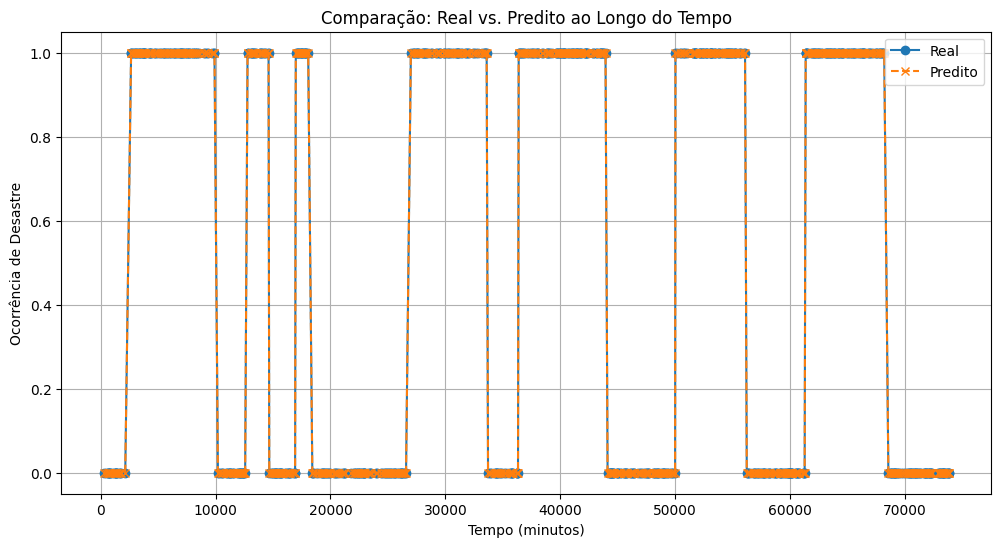

In [ ]:
# Criar DataFrame de comparação
df_resultados = X_test.copy()
df_resultados['Real'] = y_test.values
df_resultados['Predito'] = y_pred
df_resultados = df_resultados.sort_values(by='Tempo_Minutos')

plt.figure(figsize=(12,6))
plt.plot(df_resultados['Tempo_Minutos'], df_resultados['Real'], label='Real', marker='o')
plt.plot(df_resultados['Tempo_Minutos'], df_resultados['Predito'], label='Predito', linestyle='--', marker='x')
plt.xlabel('Tempo (minutos)')
plt.ylabel('Ocorrência de Desastre')
plt.title('Comparação: Real vs. Predito ao Longo do Tempo')
plt.legend()
plt.grid(True)
plt.show()

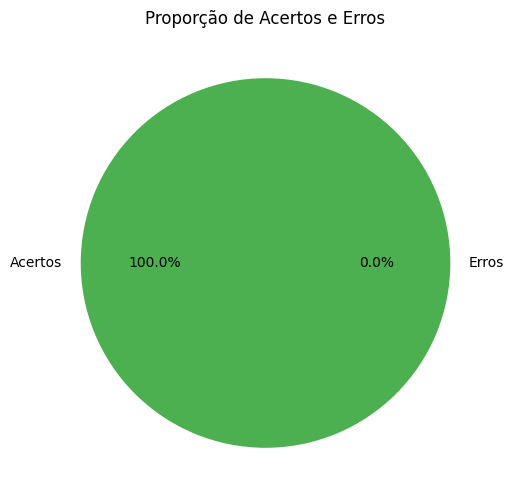

In [ ]:
# Dados para a pizza
labels_pizza = ['Acertos', 'Erros']
values_pizza = [cm[0,0] + cm[1,1], cm[0,1] + cm[1,0]]

plt.figure(figsize=(6,6))
plt.pie(values_pizza, labels=labels_pizza, autopct='%1.1f%%', colors=['#4CAF50', '#F44336'])
plt.title('Proporção de Acertos e Erros')
plt.show()

# 🟢 Modelo 2 - Previsão do Tipo de Desastre


# 4. Pré-processamento dos Dados

In [ ]:
def classificar_desastre(status):
    # Desastre: Incêndio (condições extremas)
    if any(term in status for term in [
        'Calor extremo',
        'Luminosidade crítica (possível presença de chamas)',
        'Luminosidade extremamente baixa (fumaça densa/possível incêndio)',
        'Luminosidade extremamente baixa (fumaça densa/poss��vel inc��ndio)'
    ]):
        return 2  # Incêndio

    # Alerta: Incêndio (condições moderadas)
    elif any(term in status for term in [
        'Calor alto',
        'Luminosidade baixa (fumaça moderada)',
        'Umidade baixa (alerta); Luminosidade alta (luz intensa alerta)'
    ]):
        return 1  # Alerta de incêndio

    # Desastre: Deslizamento (condição extrema)
    elif any(term in status for term in [
        'Vibração forte detectada! Possível deslizamento',
        'Vibração forte detectada! Poss��vel deslizamento'
    ]):
        return 4  # Deslizamento

    # Alerta: Deslizamento (condição moderada)
    elif 'Vibração moderada (alerta)' in status:
        return 3  # Alerta de deslizamento

    # Desastre: Enchente (condição extrema)
    elif 'Enchente iminente' in status:
        return 6  # Enchente

    # Alerta: Enchente (condição moderada)
    elif 'Nível da água elevado (alerta)' in status:
        return 5  # Alerta de enchente

    # Sem desastre
    elif 'SEGURO: Nenhum risco detectado' in status:
        return 0  # Sem desastre

    # Outros casos (ex.: apenas "Umidade baixa" ou "Luminosidade alta")
    else:
        return 0  # Sem desastre

# Aplicação no DataFrame
df['Tipo_Desastre'] = df['Status Risco'].apply(classificar_desastre)

In [ ]:
# Features a serem usadas
features_multiclasse = [
    'Temperatura (ºC)',
    'Umidade (%)',
    'Luminosidade (LUX)',
    'Nivel da agua',
    'Vibração do solo',
    'Tempo_Minutos',
    'Hora_sin',
    'Hora_cos'
]

# Criar dataframe multiclasse
df_multiclasse = df[features_multiclasse + ['Tipo_Desastre']].copy()

# Separar X e y
X_multi = df_multiclasse[features_multiclasse]
y_multi = df_multiclasse['Tipo_Desastre']

In [ ]:
X_multi

,Temperatura (ºC),Umidade (%),Luminosidade (LUX),Nivel da agua,Vibração do solo,Tempo_Minutos,Hora_sin,Hora_cos
0,21.9,64,497.04,357,2033,210,0.793353,6.087614e-01
1,21.9,64,497.04,357,2033,240,0.866025,5.000000e-01
2,21.9,64,497.04,357,2033,270,0.923880,3.826834e-01
3,21.9,64,497.04,357,2033,300,0.965926,2.588190e-01
4,21.9,64,497.04,357,2033,330,0.991445,1.305262e-01
...,...,...,...,...,...,...,...,...
2452,26.2,43,1249.81,243,2610,73770,0.991445,1.305262e-01
2453,26.2,43,1249.81,243,2610,73800,1.000000,6.123234e-17
2454,26.2,43,1249.81,243,2610,73830,0.991445,-1.305262e-01
2455,26.2,43,1249.81,243,2610,73860,0.965926,-2.588190e-01


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir em treino e teste
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42, stratify=y_multi)

#5. Machine Learning - Modelagem

Neste projeto, foram utilizados dois modelos de Machine Learning supervisionado, pois temos um conjunto de dados rotulado, onde sabemos tanto se houve um acidente quanto sua gravidade. Os modelos supervisionados aprendem com exemplos históricos e são capazes de prever novos casos com base nos padrões identificados.

Foram implementadas duas abordagens complementares:

Classificação Binária – prever se ocorrerá ou não um acidente(no caso isso foi simulado com houve fatalidade ou não), com base nas condições da estrada, clima, período do dia, entre outros fatores.

Classificação Multiclasse – para os casos onde o acidente ocorre, prever a gravidade da ocorrência: leve, grave ou com óbito.

O algoritmo escolhido para ambos os modelos foi o Random Forest Classifier, um modelo baseado em árvores de decisão que funciona criando múltiplas árvores e combinando suas previsões (votação), o que geralmente resulta em alta precisão e robustez, mesmo em bases com dados categóricos mistos e ruído.

O Random Forest foi escolhido por sua capacidade de lidar bem com dados tabulares e categóricos, ser menos sensível a outliers, e fornecer métricas de importância das variáveis — um fator crucial para entender quais condições mais influenciam a ocorrência e a gravidade dos acidentes.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Inicializar o modelo
model_multi = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinar
model_multi.fit(X_train_multi, y_train_multi)

RandomForestClassifier(random_state=42)

Relatório de Classificação - Multiclasse:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       168
           1       0.96      0.96      0.96        26
           2       0.99      1.00      1.00       142
           3       0.98      1.00      0.99        45
           4       1.00      1.00      1.00        72
           5       1.00      0.33      0.50         3
           6       0.97      1.00      0.99        36

    accuracy                           0.99       492
   macro avg       0.99      0.90      0.92       492
weighted avg       0.99      0.99      0.99       492



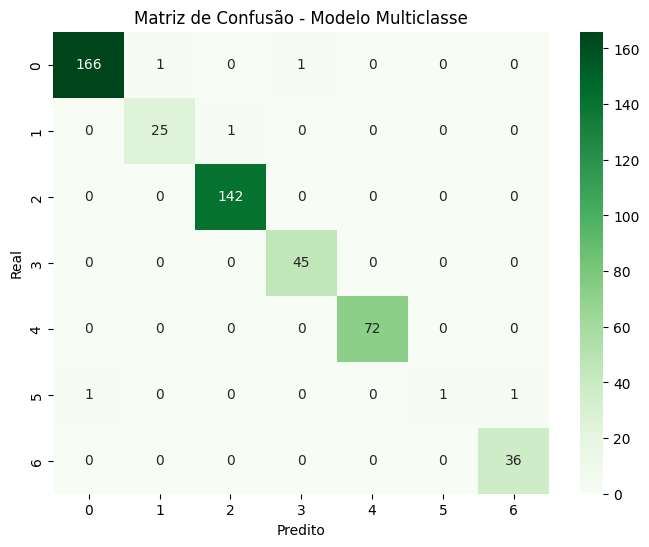

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Prever no conjunto de teste
y_pred_multi = model_multi.predict(X_test_multi)

# Relatório de classificação
print('Relatório de Classificação - Multiclasse:')
print(classification_report(y_test_multi, y_pred_multi))

# Matriz de Confusão
cm_multi = confusion_matrix(y_test_multi, y_pred_multi)

plt.figure(figsize=(8,6))
sns.heatmap(cm_multi, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Modelo Multiclasse')
plt.show()

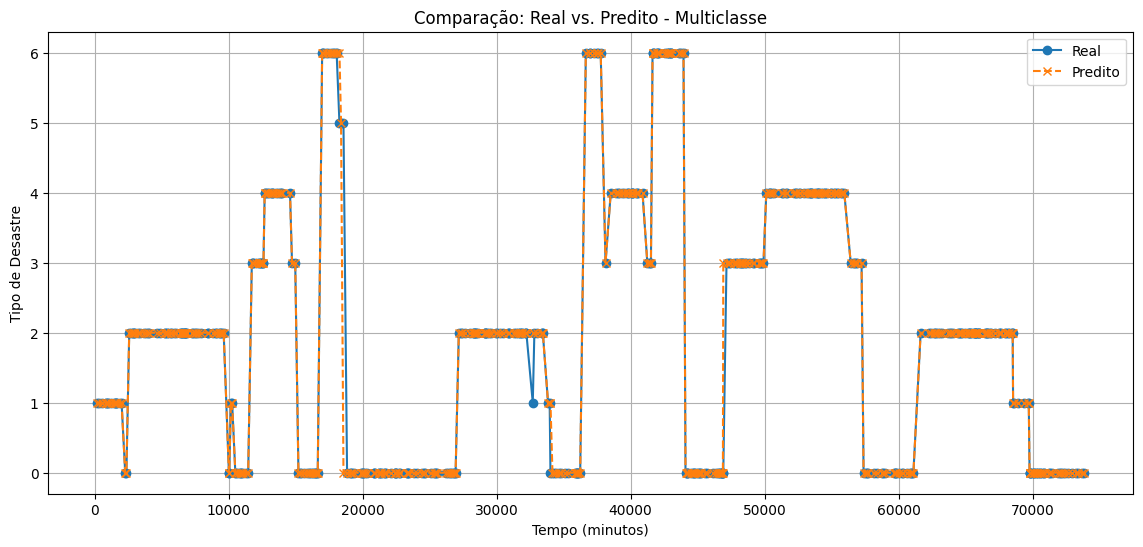

In [ ]:
# Criar dataframe de comparação
df_resultados_multi = X_test_multi.copy()
df_resultados_multi['Real'] = y_test_multi.values
df_resultados_multi['Predito'] = y_pred_multi
df_resultados_multi = df_resultados_multi.sort_values(by='Tempo_Minutos')

plt.figure(figsize=(14,6))
plt.plot(df_resultados_multi['Tempo_Minutos'], df_resultados_multi['Real'], label='Real', marker='o')
plt.plot(df_resultados_multi['Tempo_Minutos'], df_resultados_multi['Predito'], label='Predito', linestyle='--', marker='x')
plt.xlabel('Tempo (minutos)')
plt.ylabel('Tipo de Desastre')
plt.title('Comparação: Real vs. Predito - Multiclasse')
plt.legend()
plt.grid(True)
plt.show()

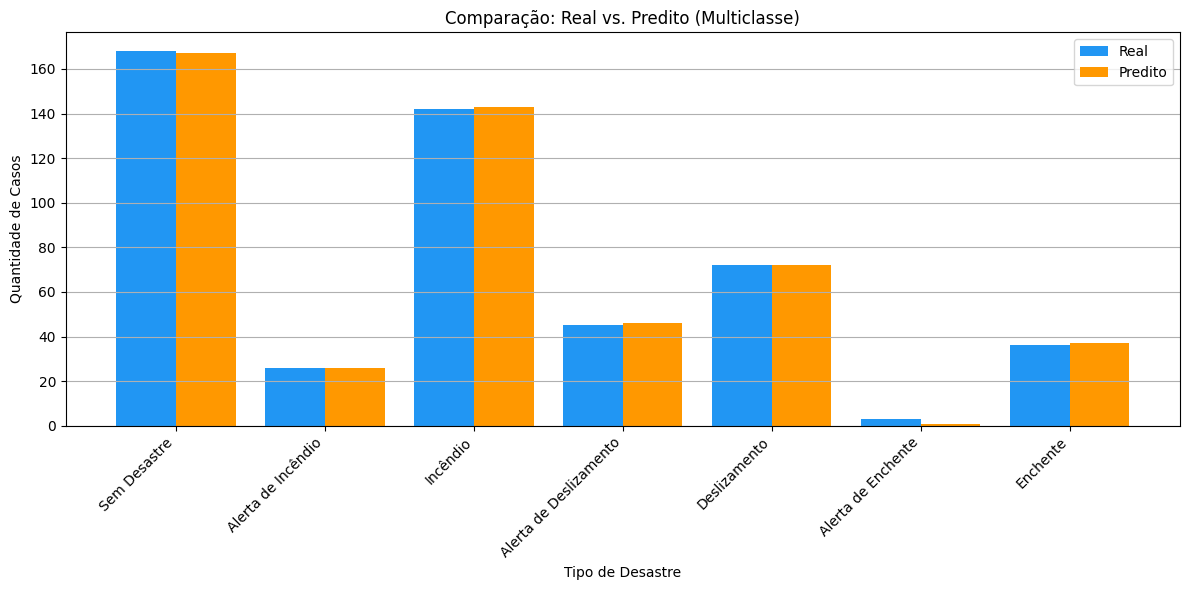

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Contagem Real e Predita
real_counts = y_test_multi.value_counts().sort_index()
pred_counts = pd.Series(y_pred_multi).value_counts().sort_index()

# Rótulos descritivos para cada classe
labels = {
    0: 'Sem Desastre',
    1: 'Alerta de Incêndio',
    2: 'Incêndio',
    3: 'Alerta de Deslizamento',
    4: 'Deslizamento',
    5: 'Alerta de Enchente',
    6: 'Enchente'
}
# Criar lista de rótulos com base nos índices presentes
plot_labels = [labels[i] for i in real_counts.index]

x = range(len(plot_labels))  # Posições

plt.figure(figsize=(12,6))
plt.bar(x, real_counts, width=0.4, label='Real', color='#2196F3')
plt.bar([i + 0.4 for i in x], pred_counts, width=0.4, label='Predito', color='#FF9800')

plt.xlabel('Tipo de Desastre')
plt.ylabel('Quantidade de Casos')
plt.title('Comparação: Real vs. Predito (Multiclasse)')
plt.xticks([i + 0.2 for i in x], plot_labels, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()  # Ajusta o layout para evitar corte de rótulos
plt.show()

# 6. Avaliando com Simulação de entrada de dados

In [ ]:
import numpy as np
import pandas as pd

# Exemplo: seu novo dado bruto, pode ser uma lista de dicts, csv, etc.
novos_dados = [
    {'Data': 'Dia 2 14:45', 'Temperatura (ºC)': 15, 'Umidade (%)': 35, 'Luminosidade (LUX)': 120, 'Nivel da agua': 520, 'Vibração do solo': 320, 'Status Risco': 'SEGURO: Nenhum risco detectado'},  # Classe 0
    {'Data': 'Dia 2 15:15', 'Temperatura (ºC)': 16, 'Umidade (%)': 37, 'Luminosidade (LUX)': 80, 'Nivel da agua': 530, 'Vibração do solo': 350, 'Status Risco': 'SEGURO: Nenhum risco detectado'},  # Classe 0
    {'Data': 'Dia 2 15:45', 'Temperatura (ºC)': 30, 'Umidade (%)': 25, 'Luminosidade (LUX)': 1000, 'Nivel da agua': 300, 'Vibração do solo': 200, 'Status Risco': 'Calor alto (alerta); Umidade baixa (alerta)'},  # Classe 1
    {'Data': 'Dia 2 16:15', 'Temperatura (ºC)': 35, 'Umidade (%)': 20, 'Luminosidade (LUX)': 50, 'Nivel da agua': 350, 'Vibração do solo': 250, 'Status Risco': 'Luminosidade baixa (fumaça moderada)'},  # Classe 1
    {'Data': 'Dia 2 16:45', 'Temperatura (ºC)': 40, 'Umidade (%)': 15, 'Luminosidade (LUX)': 10, 'Nivel da agua': 300, 'Vibração do solo': 200, 'Status Risco': 'Calor extremo; Luminosidade extremamente baixa (fumaça densa/possível incêndio)'},  # Classe 2
    {'Data': 'Dia 2 17:15', 'Temperatura (ºC)': 38, 'Umidade (%)': 10, 'Luminosidade (LUX)': 5000, 'Nivel da agua': 320, 'Vibração do solo': 220, 'Status Risco': 'Calor extremo; Luminosidade crítica (possível presença de chamas)'},  # Classe 2
    {'Data': 'Dia 2 17:45', 'Temperatura (ºC)': 20, 'Umidade (%)': 50, 'Luminosidade (LUX)': 200, 'Nivel da agua': 400, 'Vibração do solo': 600, 'Status Risco': 'Vibração moderada (alerta)'},  # Classe 3
    {'Data': 'Dia 2 18:15', 'Temperatura (ºC)': 22, 'Umidade (%)': 55, 'Luminosidade (LUX)': 250, 'Nivel da agua': 450, 'Vibração do solo': 1200, 'Status Risco': 'Vibração forte detectada! Possível deslizamento'},  # Classe 4
    {'Data': 'Dia 2 18:45', 'Temperatura (ºC)': 18, 'Umidade (%)': 60, 'Luminosidade (LUX)': 300, 'Nivel da agua': 700, 'Vibração do solo': 300, 'Status Risco': 'Nível da água elevado (alerta)'},  # Classe 5
    {'Data': 'Dia 2 19:15', 'Temperatura (ºC)': 19, 'Umidade (%)': 65, 'Luminosidade (LUX)': 280, 'Nivel da agua': 900, 'Vibração do solo': 350, 'Status Risco': 'Enchente iminente'},  # Classe 6
]

df_novos = pd.DataFrame(novos_dados)

# Extrair Dia, Hora, Minuto
df_novos['Dia'] = df_novos['Data'].str.extract(r'Dia (\d+)').astype(int)
df_novos['Hora'] = df_novos['Data'].str.extract(r'(\d+):(\d+)')[0].astype(int)
df_novos['Minuto'] = df_novos['Data'].str.extract(r'(\d+):(\d+)')[1].astype(int)

# Criar Tempo_Minutos
df_novos['Tempo_Minutos'] = (df_novos['Dia'] - 1)*24*60 + df_novos['Hora']*60 + df_novos['Minuto']

# Hora do dia em minutos
df_novos['Hora_Dia_Min'] = df_novos['Hora']*60 + df_novos['Minuto']

# Calcular Hora_sin e Hora_cos
df_novos['Hora_sin'] = np.sin(2 * np.pi * df_novos['Hora_Dia_Min'] / 1440)
df_novos['Hora_cos'] = np.cos(2 * np.pi * df_novos['Hora_Dia_Min'] / 1440)

# Selecionar features para o modelo binário (exemplo)
features_binario = [
    'Temperatura (ºC)', 'Umidade (%)', 'Luminosidade (LUX)',
    'Nivel da agua', 'Vibração do solo', 'Tempo_Minutos',
    'Hora_sin', 'Hora_cos'
]

X_novos = df_novos[features_binario]


In [ ]:
X_novos

,Temperatura (ºC),Umidade (%),Luminosidade (LUX),Nivel da agua,Vibração do solo,Tempo_Minutos,Hora_sin,Hora_cos
0,15,35,120,520,320,2325,-0.659346,-0.751840
1,16,37,80,530,350,2355,-0.751840,-0.659346
2,30,25,1000,300,200,2385,-0.831470,-0.555570
3,35,20,50,350,250,2415,-0.896873,-0.442289
4,40,15,10,300,200,2445,-0.946930,-0.321439
5,38,10,5000,320,220,2475,-0.980785,-0.195090
6,20,50,200,400,600,2505,-0.997859,-0.065403
7,22,55,250,450,1200,2535,-0.997859,0.065403
8,18,60,300,700,300,2565,-0.980785,0.195090
9,19,65,280,900,350,2595,-0.946930,0.321439


In [ ]:
# 1. Predição multiclasse: o modelo já prevê "sem desastre" (classe 0) ou o tipo de desastre
pred_final_multiclasse = model_multi.predict(X_novos)

# 2. Mapeamento textual das classes
mapeamento_desastres = {
    0: 'Sem desastre',
    1: 'Calor/Umidade crítica (alerta)',
    2: 'Incêndio ou fumaça densa',
    3: 'Vibração moderada',
    4: 'Vibração forte (possível deslizamento)',
    5: 'Nível de água elevado',
    6: 'Enchente iminente'
}

# 3. Mostrar os resultados
for i in range(len(pred_final_multiclasse)):
    print(f"Exemplo {i+1}:")
    if pred_final_multiclasse[i] == 0:
        print("  Vai ocorrer desastre? Não")
    else:
        print("  Vai ocorrer desastre? Sim")
        print(f"  Tipo previsto: {mapeamento_desastres[pred_final_multiclasse[i]]}")
    print()

Exemplo 1:
  Vai ocorrer desastre? Sim
  Tipo previsto: Calor/Umidade crítica (alerta)

Exemplo 2:
  Vai ocorrer desastre? Sim
  Tipo previsto: Calor/Umidade crítica (alerta)

Exemplo 3:
  Vai ocorrer desastre? Não

Exemplo 4:
  Vai ocorrer desastre? Sim
  Tipo previsto: Calor/Umidade crítica (alerta)

Exemplo 5:
  Vai ocorrer desastre? Sim
  Tipo previsto: Incêndio ou fumaça densa

Exemplo 6:
  Vai ocorrer desastre? Sim
  Tipo previsto: Incêndio ou fumaça densa

Exemplo 7:
  Vai ocorrer desastre? Sim
  Tipo previsto: Calor/Umidade crítica (alerta)

Exemplo 8:
  Vai ocorrer desastre? Sim
  Tipo previsto: Calor/Umidade crítica (alerta)

Exemplo 9:
  Vai ocorrer desastre? Sim
  Tipo previsto: Calor/Umidade crítica (alerta)

Exemplo 10:
  Vai ocorrer desastre? Sim
  Tipo previsto: Calor/Umidade crítica (alerta)



# Conclusão

O desenvolvimento do modelo de Machine Learning para prever o risco de roubo/furto de carga revelou insights valiosos. A codificação one-hot foi essencial para tratar variáveis categóricas como AREA, DEP, e REGIAO, evitando distorções que o Label Encoding poderia causar em dados nominais. A hipertunagem do parâmetro k no modelo KNN, permitiu identificar o valor ótimo de vizinhos, otimizando a acurácia. A análise de uma observação hipotética (julho, Capital, DECAP) resultou em uma previsão de baixo risco com 63,33% de probabilidade, mas a confiança moderada (36,67% para alto risco) indica incerteza, sugerindo a necessidade de mais features (ex.: tipo de carga, horário) ou dados para melhorar a separação entre classes. A localização urbana e a jurisdição DECAP mostraram padrões mistos, reforçando a importância de cautela em decisões práticas. Aprendizados incluem a relevância de pré-processamento robusto, a escolha cuidadosa de técnicas de codificação e a necessidade de explorar modelos mais interpretáveis, como Random Forest, para cenários críticos.

## Melhorias

- Inclusão de Novas Features: Adicionar variáveis como tipo de carga, horário do incidente, valor da carga ou condições logísticas (ex.: tipo de transporte) para capturar mais padrões e melhorar a precisão do modelo.
- Teste de Outros Modelos: Experimentar algoritmos como Random Forest, Gradient Boosting ou redes neurais, que podem oferecer maior capacidade preditiva e interpretabilidade em comparação com o KNN.
- Ajuste de Threshold: Modificar o limiar de decisão (ex.: de 0,5 para 0,6) para priorizar a redução de falsos negativos em cenários de alto risco, considerando o impacto de erros em segurança.
- Aumento de Dados: Buscar datasets adicionais (ex.: fontes internacionais como CargoNet, se acessíveis) ou realizar aumento de dados sintéticos para melhorar a robustez, especialmente em classes desbalanceadas.
- Validação Cruzada Avançada: Usar técnicas como Stratified K-Fold para lidar com possível desbalanceamento no target, garantindo avaliações mais confiáveis.
Análise de Importância de Features: Implementar métodos (ex.: SHAP ou feature importance de Random Forest) para identificar quais variáveis (ex.: MES, AREA_Capital) mais influenciam as previsões e focar nelas.
- Otimização de Hiperparâmetros Adicionais: No KNN, explorar outros parâmetros como weights (uniforme ou distância) e metric (ex.: euclidiana, manhattan) para refinar o desempenho.
- Testes com Cenários Diversos: Simular mais observações hipotéticas (ex.: diferentes meses, regiões ou jurisdições) para verificar a generalização do modelo e identificar pontos fracos em contextos específicos.